<a href="https://colab.research.google.com/github/ZenoZoldyck/hand_on_tensorflow/blob/main/Classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer

tf.__version__

'2.5.0'

In [6]:
# create our own data
from sklearn.datasets import make_circles
n = 1000
X, y = make_circles(n, noise = 0.03, random_state = 42)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

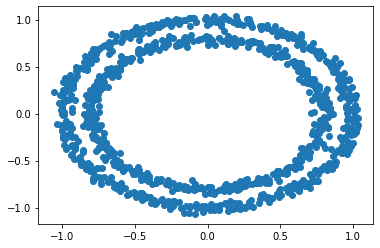

In [19]:
# plotting our dataset

plt.scatter(X[:, 0], X[:, 1])

In [28]:
# split data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test), X_train.dtype

(1000, 800, 200, dtype('float64'))

In [31]:
# time for model creation

model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(10, activation = "relu"),
     tf.keras.layers.Dense(1, activation = "sigmoid")                          
])
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

history = model_1.fit(X_train, y_train, epochs = 100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5638
Epoch 3/100
25/25 [==============================] - 0s 913us/step - loss: 0.6727 - accuracy: 0.5825
Epoch 4/100
25/25 [==============================] - 0s 820us/step - loss: 0.6626 - accuracy: 0.6263
Epoch 5/100
25/25 [==============================] - 0s 791us/step - loss: 0.6512 - accuracy: 0.7237
Epoch 6/100
25/25 [==============================] - 0s 930us/step - loss: 0.6360 - accuracy: 0.7387
Epoch 7/100
25/25 [==============================] - 0s 837us/step - loss: 0.6208 - accuracy: 0.8475
Epoch 8/100
25/25 [==============================] - 0s 893us/step - loss: 0.6043 - accuracy: 0.8587
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.8313
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.91

In [30]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 1.0000


[0.04454764351248741, 1.0]

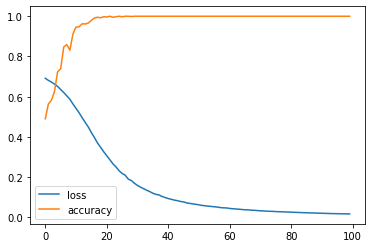

In [32]:
# visualizing the traning phase

pd.DataFrame(history.history).plot()

In [35]:
model_1.predict(X_test[:5]), y_test[:5]

(array([[0.995507  ],
        [0.02612251],
        [0.99755275],
        [0.00399339],
        [0.8838652 ]], dtype=float32), array([1, 0, 1, 0, 1]))

In [36]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
